In [22]:
import matplotlib.pyplot as plt
import healpy as hp
from pyuvdata import UVBeam
from pyuvdata import UVData
from MoonLSTs import zenithdec, zenithra  #Importing the RA and Dec fo HERA zenith
import numpy as np
%matplotlib notebook

In [23]:
hera_beam = UVBeam() #Instantiating HERA's beam as a UVBeam object
hera_beam.read_beamfits("NF_HERA_power_beam_healpix.fits") #Reading in the beam model
nside = hera_beam.nside #Setting the nside variable to be used in plotting

<IPython.core.display.Javascript object>


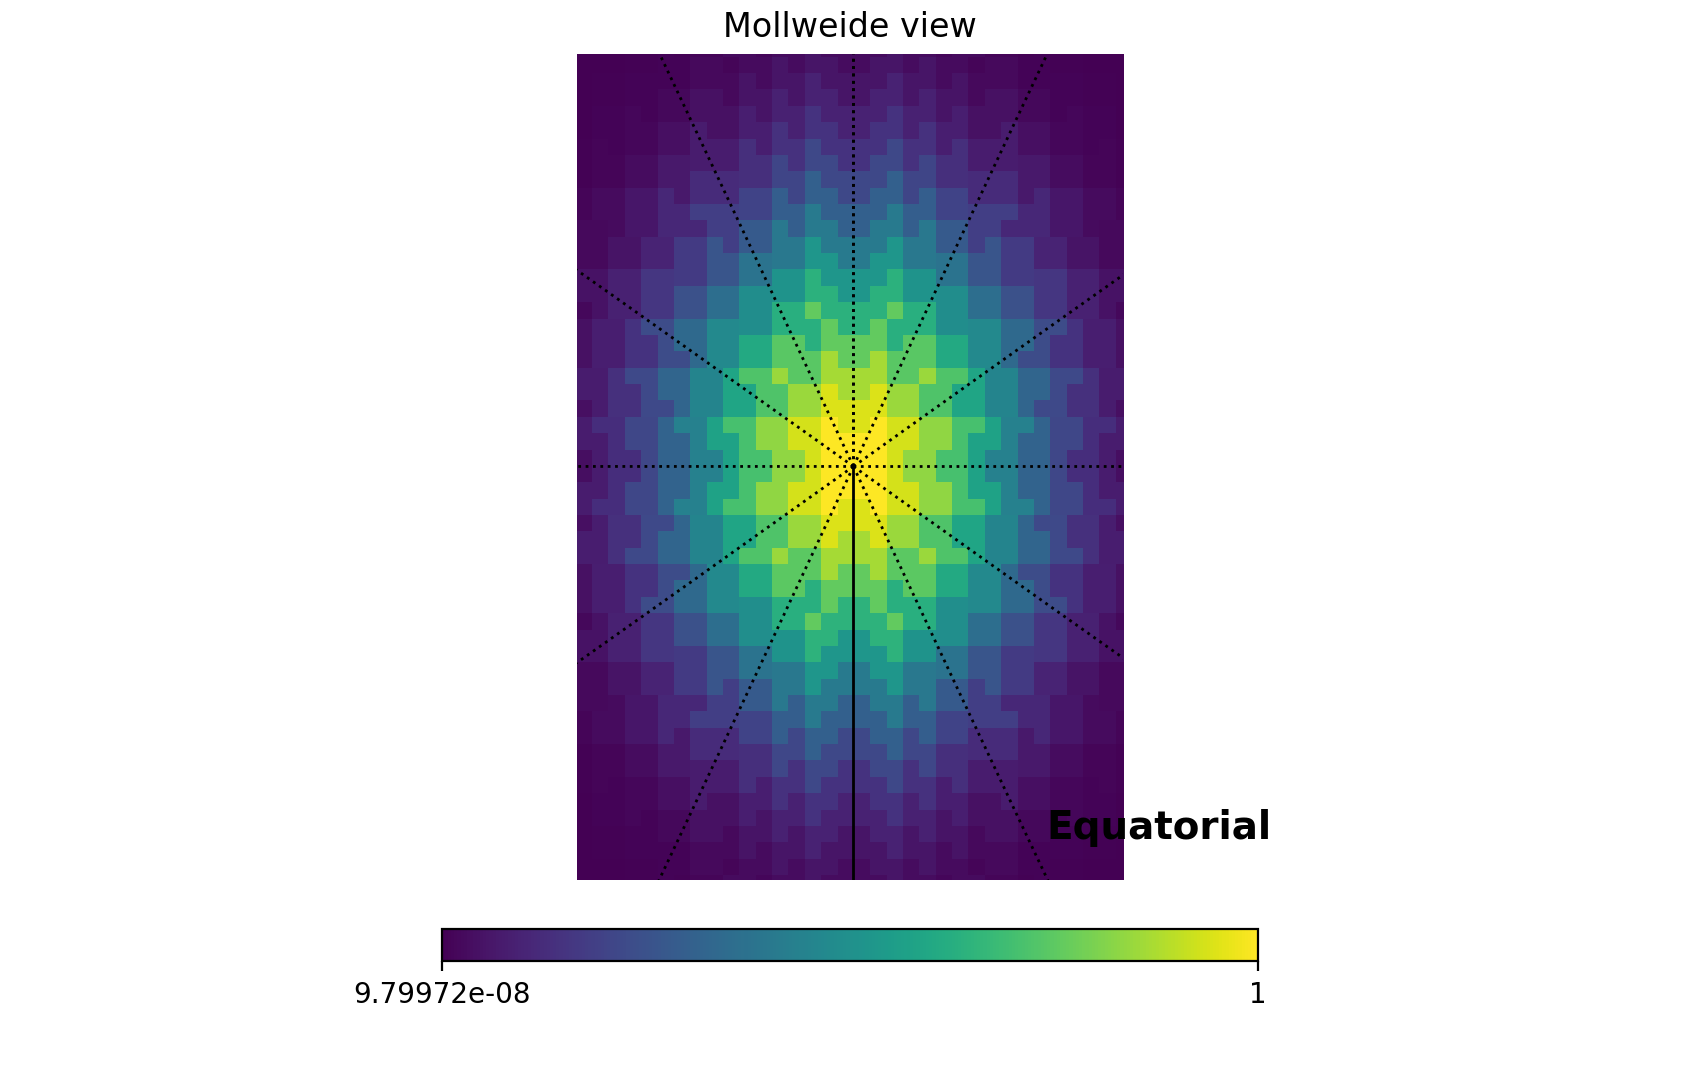

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


In [24]:
beam_map = hera_beam.data_array[0][0][0][80] #Selecting a specific frequency to observe
beam_map_norm = beam_map/np.max(beam_map)
hp.mollview(beam_map_norm, nest=None, coord="C" #)
                                                ,rot=[0.0,90.0]) #Best look at beam
                                                #,rot=[21.4,-30.7])
hp.graticule()

In [25]:
#Getting familiar with beam_map
print beam_map
print len(beam_map), np.max(beam_map), np.min(beam_map), beam_map.shape, type(beam_map)

[1.25163918e+04 1.25159340e+04 1.25159340e+04 ... 2.51189913e+00
 2.51190077e+00 2.50930622e+00]
49152 12516.439491241637 0.001226575516619302 (49152,) <type 'numpy.ndarray'>


In [26]:
print hera_beam.data_array.shape

(1, 1, 2, 101, 49152)


In [27]:
hera_beam._data_array.description

'Depending on beam type, either complex E-field values ("efield" beam type) or power values ("power" beam type) for beam model. units are linear normalized to either peak or solid angle as given by data_normalization. The shape depends on the beam_type and pixel_coordinate_system, if it is "healpix", the shape is: (Naxes_vec, Nspws, Nfeeds or Npols, Nfreqs, Npixels), otherwise it is (Naxes_vec, Nspws, Nfeeds or Npols, Nfreqs, Naxes2, Naxes1)'

<IPython.core.display.Javascript object>


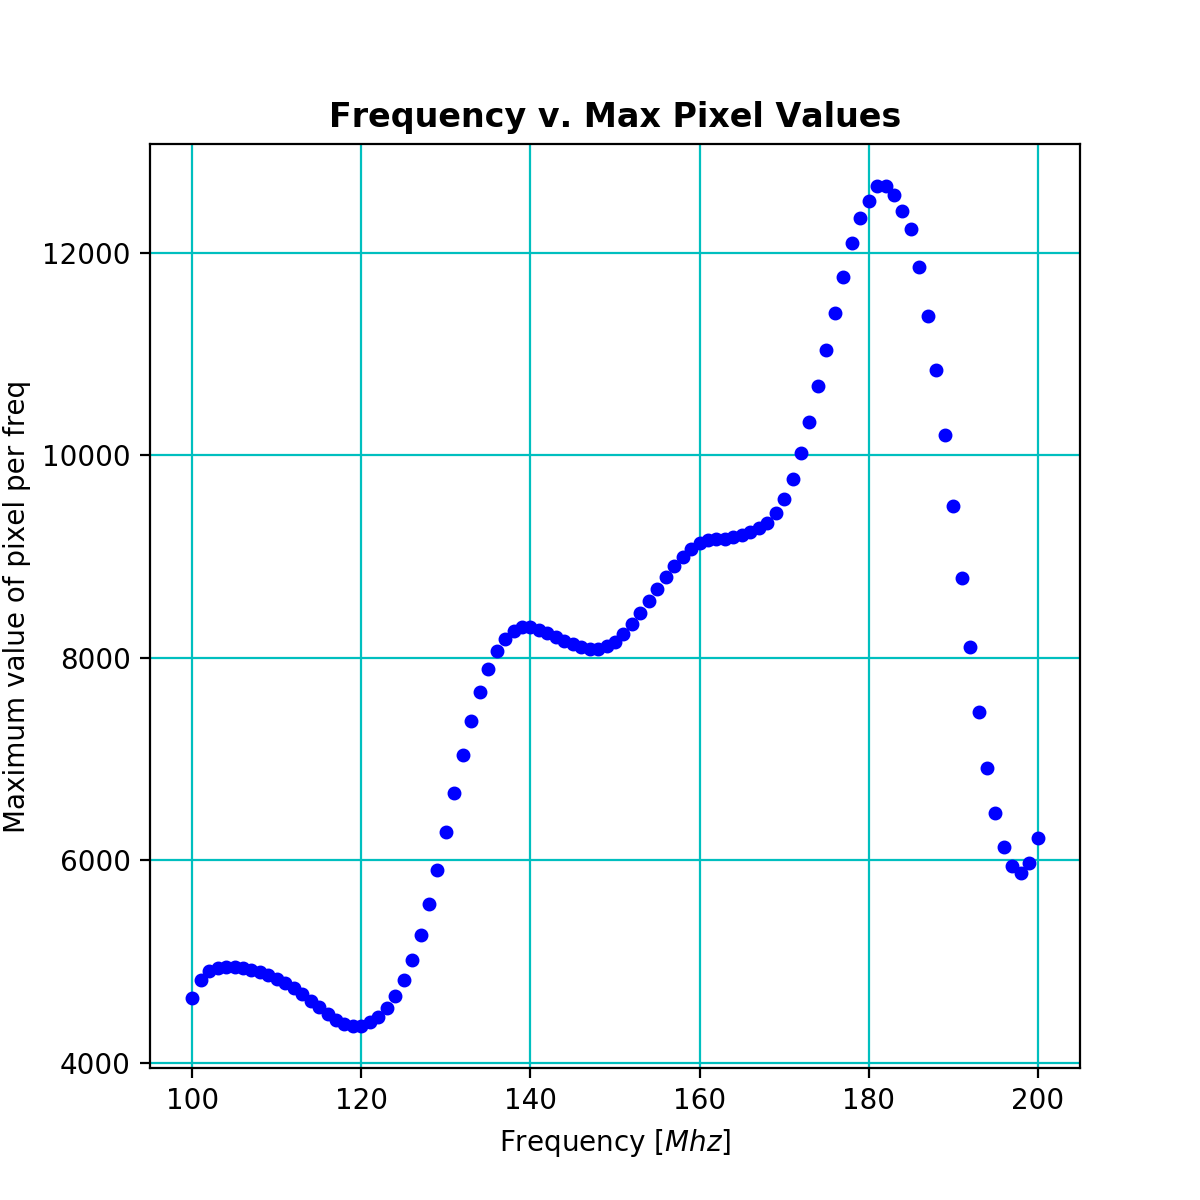

In [28]:
fig1 = plt.figure(figsize=(6.0,6.0))
#Plotting Frequency vs Maximum pixel value for each freq.
for i in range(101):
    plt.plot(i+100,np.max(hera_beam.data_array[0][0][0][i]), "bo", markersize=4.0)
plt.xlabel("Frequency [$Mhz$]")
plt.ylabel("Maximum value of pixel per freq")
plt.title("Frequency v. Max Pixel Values", fontweight="bold")
plt.grid(True, color="c")

In [101]:
"""
m = np.arange(hp.nside2npix(nside))
hp.gnomview(beam_map, rot=[21.4,-30.7])
hp.graticule()
"""

'\nm = np.arange(hp.nside2npix(nside))\nhp.gnomview(beam_map, rot=[21.4,-30.7])\nhp.graticule()\n'

In [29]:
zenithra                             #Checking for RA value correctness
zenithra_deg = np.rad2deg(zenithra)  #Converting from radians to degrees
print zenithra_deg

313.3679874878402


In [30]:
zenithdec                              #Checking for Dec value correctness
zenithdec_deg = np.rad2deg(zenithdec)  #Converting from radians to degrees
print zenithdec_deg

-30.72152612068925


In [31]:
def hera_to_npole(ra,dec):
    """
    Transforming the long/ra and colat/dec from HERA
    to the same coordinates relative to the North Pole
    as the beam is set to NP.
    'ra' : Right ascension in degrees
    'dec': declination in degrees
    """
    hera_ra    = ra                               #RA as seen by HERA
    hera_dec   = np.abs(dec)                      #Dec as seen by HERA
    rel_dec    = hera_dec + zenithdec_deg         #Finding relative Dec at HERA
    rel_ra     = np.abs(hera_ra - zenithra_deg)   #Finding relative RA at HERA
    np_dec     = 90.0 - np.abs(rel_dec)           #Finding corresponding North Pole Dec
    np_ra      = rel_ra                           #Finding corresponding North Pole RA
    
    return np_ra, np_dec                          #Returning values applicable to North Pole

In [32]:
test_ra, test_dec = hera_to_npole(315.418915,-28.055460) #Testing function with "known" beam factor
print test_ra, test_dec

2.0509275121598307 87.33393387931075


In [33]:
moonbeam_ra, moonbeam_dec = hera_to_npole(316.15973309,-15.84410523) #NOW FOR THE MOON!
print moonbeam_ra, moonbeam_dec

2.7917456021597786 75.12257910931075
